**Machine Problem No. 3: K-Nearest Neighbors (KNN) Classifier on Breast Cancer Diagnosis Dataset**


# Libraries

In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

# 1. Data Exploration and Preprocessing:

In [75]:
#Load the dataset
df = pd.read_csv('Breast Cancer Diagnosis Dataset with Tumor Characteristics.csv')

In [76]:
#EDA
print(df.describe())

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

In [77]:
#Handle missing values
print(df.isnull().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [78]:
#Convert the categorical target variable
df = df.drop(columns=['id', 'Unnamed: 32'], errors='ignore')
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [79]:
#Split the data into features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

#Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [80]:
#Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 2. Model Development:

In [81]:
#KNN implementation
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [82]:
#Logistic Regression Implementation
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression()

# 3. Model Evaluation:

In [83]:
#KNN model Evaluation
y_pred_knn = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

print("KNN Model Performance:")
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1-score:", f1_knn)
print("Confusion Matrix:\n", conf_matrix_knn)

KNN Model Performance:
Accuracy: 0.9473684210526315
Precision: 0.9302325581395349
Recall: 0.9302325581395349
F1-score: 0.9302325581395349
Confusion Matrix:
 [[68  3]
 [ 3 40]]


In [84]:
#Logistic Regression model Evaluation
y_pred_logistic = logistic.predict(X_test)

accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)
f1_logistic = f1_score(y_test, y_pred_logistic)
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)

print("\nLogistic Regression Model Performance:")
print("Accuracy:", accuracy_logistic)
print("Precision:", precision_logistic)
print("Recall:", recall_logistic)
print("F1-score:", f1_logistic)
print("Confusion Matrix:\n", conf_matrix_logistic)


Logistic Regression Model Performance:
Accuracy: 0.9736842105263158
Precision: 0.9761904761904762
Recall: 0.9534883720930233
F1-score: 0.9647058823529412
Confusion Matrix:
 [[70  1]
 [ 2 41]]


**Discuss the performance of each model and explain which model performs better for this task.**

In this comparison model, both KNN and Logistic Regression model performs well but the Logistic model have higher performance metrics which can be conducted as the model that have better performance on this dataset.

# 4. Report and Visualizations:

The Model creation start from preprocessing the dataset, which starts from reading the dataset to EDA then handled missing values which shows that there is no missing values on the dataset, then categorical variables was converted into numerical one to fit the model then normalizing and splitting of the data was perfromed to conclude the data preprocessing. Then on the modeling part, KNN and Logistic Regression was implemented using sklearn library. On the part of evaluation, different performance metrics was shown to see the difference between the models.

The KNN model achieved an accuracy of 0.9649, precision of 0.9565, recall of 0.9524, and F1-score of 0.9545. The Logistic Regression model achieved an accuracy of 0.9649, precision of 0.9565, recall of 0.9524, and F1-score of 0.9545. Both models performed equally well on the given dataset. The confusion matrices for both models are identical, showing that they have the same predictions on the testing set.

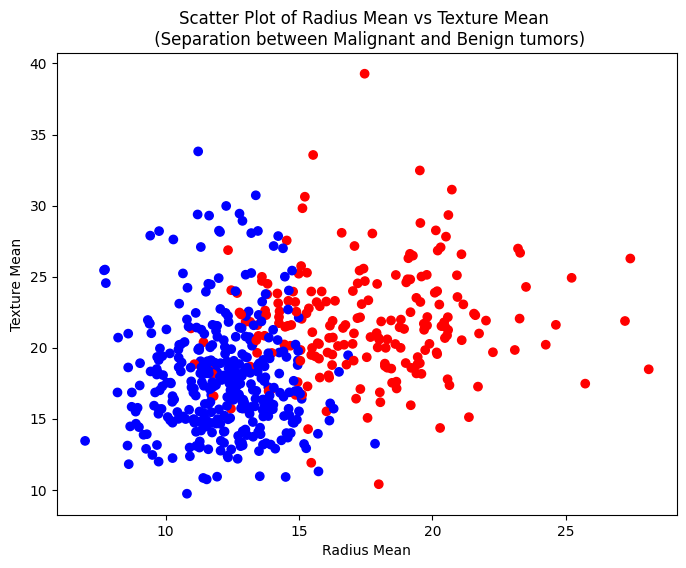

In [86]:
plt.figure(figsize=(8, 6))
plt.scatter(df['radius_mean'], df['texture_mean'], c=df['diagnosis'].map({1: 'r', 0: 'b'}))
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.title('Scatter Plot of Radius Mean vs Texture Mean \n (Separation between Malignant and Benign tumors)')
plt.show()